## News Headline Sarcasm Detection 

Given *news headlines*, let's try to predict whether a given headline contains **sarcasm**.

We will use a Tensorflow/Keras text model with word embeddings to make our predictions. 

Data Source: https://www.kaggle.com/datasets/saurabhbagchi/sarcasm-detection-through-nlp

### Getting Started

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

2024-12-04 20:37:14.926009: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


### Preprocessing

In [4]:
df = data.copy()

In [5]:
# Drop "article_link" column
df = df.drop('article_link', axis=1)
df

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [6]:
# Split df into X and y
y = df['is_sarcastic']
X = df['headline']

In [7]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

In [8]:
X_train

21906       don king enjoys grandilomentitudinous sandwich
24781    vital info on iraqi chemical weapons provided ...
22552    hacker releases new 'orange is the new black' ...
17857                      how boredom can lead to failure
20032                                mind the (gender) gap
                               ...                        
10955    5 ways to outsmart the supermarket and lose we...
17289    reflecting on the aids epidemic this gay men's...
5192     arianna joins payoff to 'reshape' financial se...
12172    rashida jones pays homage to the '90s with 'fl...
235      how to rebuild your credit after bankruptcy --...
Name: headline, Length: 18696, dtype: object

In [9]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

In [10]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'at': 14,
 'from': 15,
 'about': 16,
 'you': 17,
 'by': 18,
 'this': 19,
 'after': 20,
 'out': 21,
 'be': 22,
 'up': 23,
 'how': 24,
 'that': 25,
 'it': 26,
 'as': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'all': 33,
 'just': 34,
 'will': 35,
 'has': 36,
 'he': 37,
 'more': 38,
 'who': 39,
 'into': 40,
 'why': 41,
 'one': 42,
 'report': 43,
 'over': 44,
 'year': 45,
 'donald': 46,
 'have': 47,
 'area': 48,
 'u': 49,
 'can': 50,
 'first': 51,
 's': 52,
 'says': 53,
 'day': 54,
 'woman': 55,
 'time': 56,
 'her': 57,
 'like': 58,
 'off': 59,
 'obama': 60,
 'old': 61,
 'no': 62,
 "trump's": 63,
 'get': 64,
 'life': 65,
 'people': 66,
 'an': 67,
 'make': 68,
 'women': 69,
 'now': 70,
 "'": 71,
 'still': 72,
 'house': 73,
 'was': 74,
 'than': 75,
 'i': 76,
 '5': 77,
 'white': 78,
 'when': 79,
 'my': 80,
 'back': 81,
 'world':

In [14]:
len(tokenizer.word_index)

24845

In [15]:
tokenizer.texts_to_sequences(X_train)

[[3579, 481, 1858, 12254, 1569],
 [6496, 4001, 7, 1985, 2660, 1570, 12255, 18, 49, 52, 324, 25, 201, 215],
 [8490, 343, 11, 8491, 10, 3, 11, 4002, 6497, 20, 4579, 12256],
 [24, 6498, 50, 885, 1, 1219],
 [771, 3, 1571, 1649],
 [12257, 458, 29, 6499, 71, 60, 405, 2661, 88, 3580, 215, 12258],
 [12259, 2461, 6500, 14, 2900, 20, 1859, 3210, 4580, 12],
 [96, 28, 3, 2901, 1484, 2125, 1986, 224, 10, 3581, 121, 224],
 [4003, 12260, 5410, 55, 39, 2662, 127, 74, 12261, 8, 6501],
 [11, 2126, 8492, 8493, 288, 37, 3211, 9, 164, 69],
 [3, 8494, 1291, 182],
 [12262, 425, 146, 3582],
 [12263, 133, 50, 1152, 312, 886, 131, 28, 471, 15, 212],
 [144, 83, 8495, 3, 8496, 12264, 2, 1572, 12],
 [13, 2462, 1095, 8497, 6502, 84, 7, 109, 4, 3212, 103],
 [3, 1987, 8, 3, 12265],
 [78, 73, 12266, 9, 1096, 564, 824, 8, 1744, 14, 2463, 245],
 [237, 459, 515, 3213, 5, 607],
 [8498, 13, 3583, 1411, 16, 746, 1046, 3584],
 [12, 8, 703, 158, 105, 920],
 [55, 426, 1, 8499, 565, 6503, 2663, 4, 6504, 5, 3, 8500, 6505],
 [115

In [16]:
map(len, tokenizer.texts_to_sequences(X_train))

In [18]:
np.max(list(map(len, tokenizer.texts_to_sequences(X_train))))

40

In [19]:
tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=40, padding='post')

array([[ 3579,   481,  1858, ...,     0,     0,     0],
       [ 6496,  4001,     7, ...,     0,     0,     0],
       [ 8490,   343,    11, ...,     0,     0,     0],
       ...,
       [ 4518,  2106, 24841, ...,     0,     0,     0],
       [24843,  1042,  1441, ...,     0,     0,     0],
       [   24,     1,  5280, ...,     0,     0,     0]], dtype=int32)

In [20]:
def get_sequences(texts, tokenizer, train=True, max_seq_length=None):
    sequences = tokenizer.texts_to_sequences(texts)
    if train == True:
        max_seq_length = np.max(list(map(len, sequences)))

    sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    return sequences

In [21]:
# Create and fit tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)
print("Vocab Length:", len(tokenizer.word_index) + 1)
# Get Sequence Data
X_train = get_sequences(texts=X_train, tokenizer=tokenizer, train=True)
X_test = get_sequences(texts=X_test, tokenizer=tokenizer, train=False, max_seq_length=X_train.shape[1])
print("Sequence Length:", X_train.shape[1])

Vocab Length: 24846
Sequence Length: 40


In [22]:
X_train

array([[ 3579,   481,  1858, ...,     0,     0,     0],
       [ 6496,  4001,     7, ...,     0,     0,     0],
       [ 8490,   343,    11, ...,     0,     0,     0],
       ...,
       [ 4518,  2106, 24841, ...,     0,     0,     0],
       [24843,  1042,  1441, ...,     0,     0,     0],
       [   24,     1,  5280, ...,     0,     0,     0]], dtype=int32)

In [23]:
y_train.value_counts()

is_sarcastic
0    10499
1     8197
Name: count, dtype: int64

### Training

In [24]:
inputs = tf.keras.Input(shape=(40,))
x = tf.keras.layers.Embedding(
    input_dim = len(tokenizer.word_index)+1,
    output_dim=64
)(inputs)

2024-12-04 20:38:23.291078: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
inputs

<KerasTensor: shape=(None, 40) dtype=float32 (created by layer 'input_1')>

In [26]:
x

<KerasTensor: shape=(None, 40, 64) dtype=float32 (created by layer 'embedding')>

In [27]:
x = tf.keras.layers.Flatten()(x)
x

<KerasTensor: shape=(None, 2560) dtype=float32 (created by layer 'flatten')>

In [28]:
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.AUC(name='auc')]
)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding (Embedding)       (None, 40, 64)            1590144   
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 128)               327808    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,934,593
Trainable params: 1,934,593
Non-train

In [30]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
468/468 [==============================] - 18s 37ms/step - loss: 0.4222 - accuracy: 0.7884 - auc: 0.8818 - val_loss: 0.3223 - val_accuracy: 0.8572 - val_auc: 0.9359
Epoch 2/100
468/468 [==============================] - 17s 37ms/step - loss: 0.0972 - accuracy: 0.9668 - auc: 0.9933 - val_loss: 0.3928 - val_accuracy: 0.8487 - val_auc: 0.9254
Epoch 3/100
468/468 [==============================] - 18s 39ms/step - loss: 0.0084 - accuracy: 0.9977 - auc: 0.9998 - val_loss: 0.5459 - val_accuracy: 0.8540 - val_auc: 0.9183
Epoch 4/100
468/468 [==============================] - 18s 39ms/step - loss: 9.7759e-04 - accuracy: 0.9997 - auc: 1.0000 - val_loss: 0.6322 - val_accuracy: 0.8500 - val_auc: 0.9130


### Results

In [31]:
results = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(results[1]*100))
print("     AUC: {:.5f}".format(results[2]))

251/251 [==============================] - 1s 5ms/step - loss: 0.3155 - accuracy: 0.8592 - auc: 0.9383
Accuracy: 85.92%
     AUC: 0.93834


In [33]:
y_pred = np.squeeze(model.predict(X_test) >= 0.5).astype(np.int)

251/251 [==============================] - 1s 3ms/step


/tmp/ipykernel_63511/1249130676.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.squeeze(model.predict(X_test) >= 0.5).astype(np.int)


In [34]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

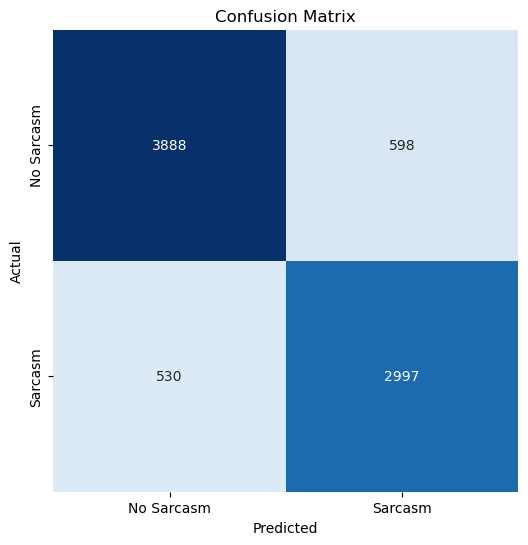

In [35]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
clr = classification_report(y_test, y_pred, labels=[0, 1], target_names=['No Sarcasm', 'Sarcasm'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['No Sarcasm', 'Sarcasm'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Sarcasm', 'Sarcasm'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
print("Classification Report:\n--------------\n", clr)

Classification Report:
--------------
               precision    recall  f1-score   support

  No Sarcasm       0.88      0.87      0.87      4486
     Sarcasm       0.83      0.85      0.84      3527

    accuracy                           0.86      8013
   macro avg       0.86      0.86      0.86      8013
weighted avg       0.86      0.86      0.86      8013

